In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import sys
import os

sys.path.append(os.path.join(os.path.abspath('.'),'../..'))

In [2]:
import plankton.plankton as pl
import matplotlib.pyplot as plt
import numpy as np

##### Load coordinate data:

In [3]:
# from urllib import request

# # Define base URL path to the data
# ISS_link = "https://export.uppmax.uu.se/snic2022-23-113/courses/spatial_omics_2022/in_situ_sequencing/S2T1_pcw6.csv"    

# # Create directory for the dataset
# os.makedirs( "./data/in_situ_sequencing" , exist_ok= True )

# # Download necessary tar.gz files
# # for tar_file in ["raw_tiles_with_z.tar.gz","SpaceTX.tar.gz"]:
# #     print ("Downloading " + base_path + tar_file)
# request.urlretrieve(ISS_link , "./data/in_situ_sequencing/coordinates.csv" )



##### Load background image:

In [4]:
# from PIL import Image
# Image.MAX_IMAGE_PIXELS = 933120000

# image_file='background.png'
# image_resolution=umpp #um/px
# image_downsampling=0.1 #downsample image to 10% resolution for faster plotting

# bg = Image.open(os.path.join(data_folder,image_file),) 
# bg = bg.resize((int(bg.width*image_downsampling),int(bg.height*image_downsampling)),Image.ANTIALIAS)
# bg = np.array(bg.getdata()).reshape((bg.height,bg.width,-1)).sum(-1)

# bgmap = pl.PixelMap(bg,upscale=1/image_downsampling/image_resolution)


In [5]:
import pandas as pd
coordinates = pd.read_csv('./data/in_situ_sequencing/coordinates.csv')

In [6]:
coordinates

,Gene,Global_y_pos,Global_x_pos,Q,parentCell
0,FLT1,4909.911982,1190.493724,1190.493724,1190.493724
1,FLT1,4908.912407,1194.492023,1194.492023,1194.492023
2,JAG2,4852.936212,1614.313488,1614.313488,1614.313488
3,RSPO2,4940.898805,1634.304986,1634.304986,1634.304986
4,SPRY1,4982.880951,1759.251850,1759.251850,1759.251850
...,...,...,...,...,...
394687,NOTCH2,11071.291758,3863.357046,3863.357046,3863.357046
394688,PDGFRB,11083.286657,3861.357897,3861.357897,3861.357897
394689,ETS1,11332.180811,3860.358322,3860.358322,3860.358322
394690,FZD1,11426.140853,3861.357897,3861.357897,3861.357897


In [7]:
bg = -plt.imread('background.jpg').mean(-1)

In [8]:
sdata = pl.SpatialData(x_coordinates=coordinates.Global_x_pos,
                       y_coordinates=coordinates.Global_y_pos,
                       genes=coordinates.Gene,
                       pixel_maps={'bg':pl.PixelMap(bg,upscale=0.504)}
                      )

(<matplotlib.collections.PathCollection at 0x7efe1c81ba30>, None, None)

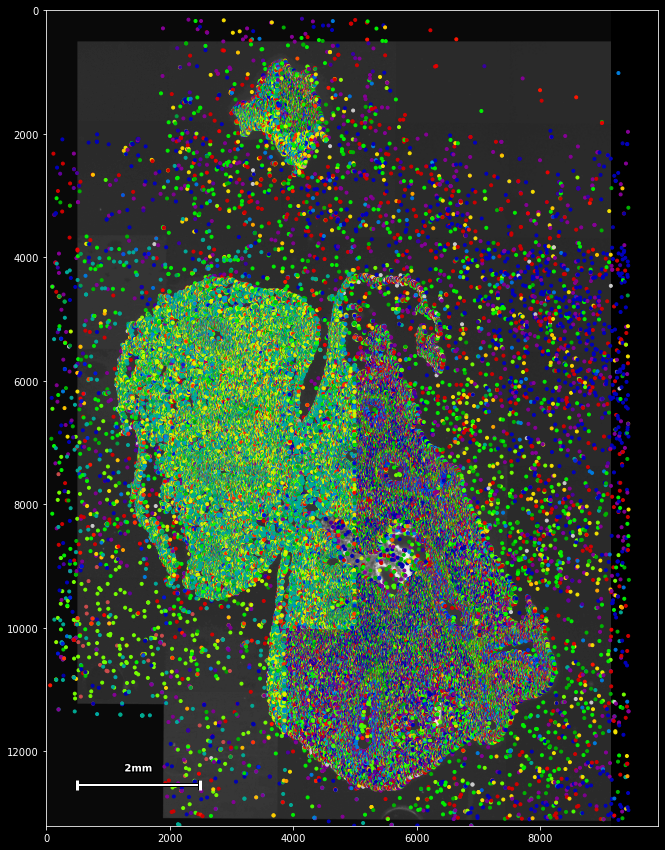

In [9]:
sdata.scatter(alpha=1,marker='.')

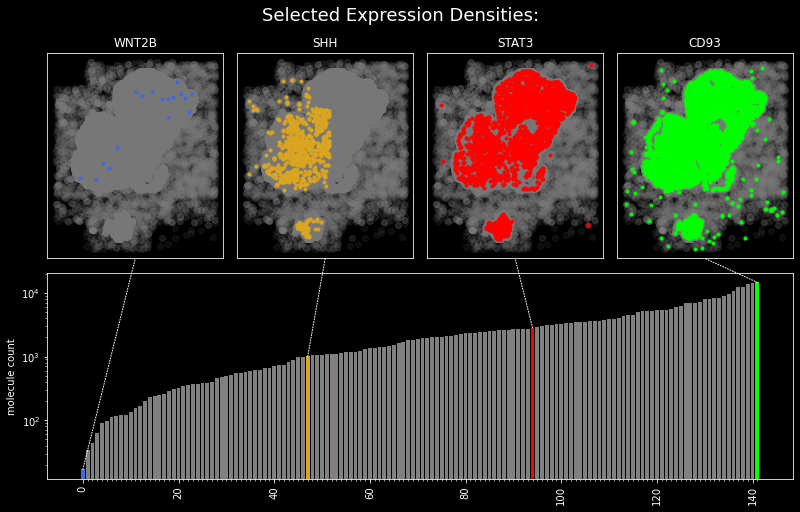

In [10]:
sdata.plot_overview()

(<matplotlib.collections.PathCollection at 0x7efdb43b5310>, None, None)

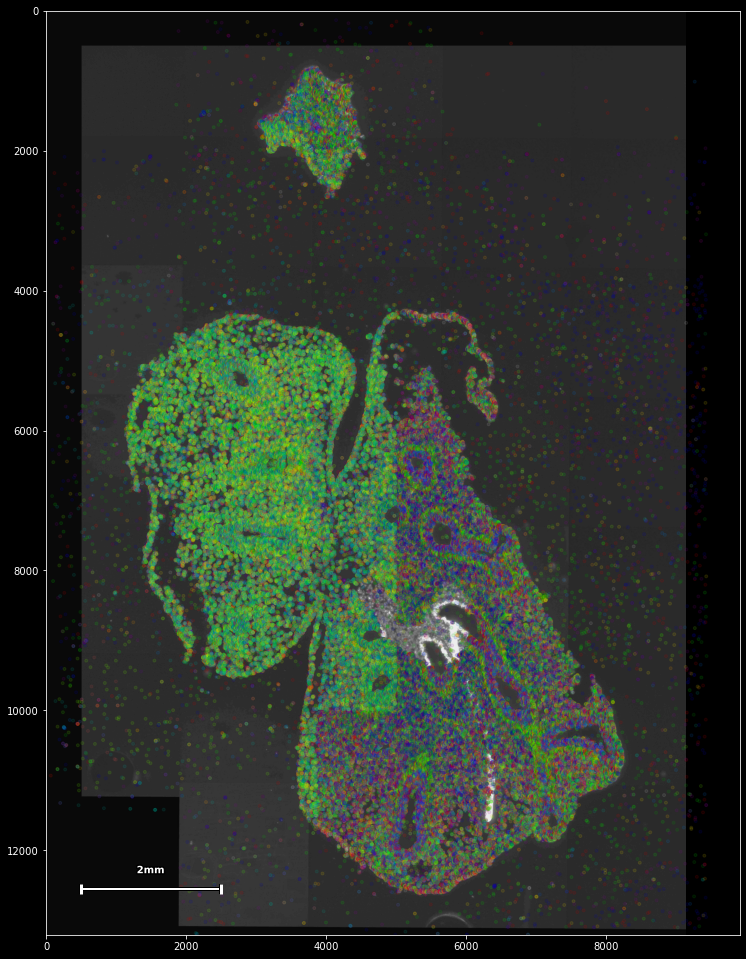

In [11]:
plt.figure(figsize=(17,17))
sdata.scatter(alpha=0.1,marker='.')

In [12]:
# sdata=pl.load('bronchi.pl')

In [13]:
# Parameterization for data cleaning/artefact removal:`

import time

knn_neighbors=250
bandwidth=30
n_neighbors=30
metric='euclidean'
min_dist=0.01
random_state=42
zero_weight=0.0
cutoff=15

_=sdata.graph.update_knn(n_neighbors=knn_neighbors)


t = time.perf_counter()
sdata.graph.run_umap(bandwidth=bandwidth,n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state,zero_weight=zero_weight,cutoff=cutoff)
print(time.perf_counter()-t)


Reducing dimensions with FastICA


/home/sebastian/anaconda3/envs/plankton-dev/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


Calculating UMAP embedding.
646.9505878970376


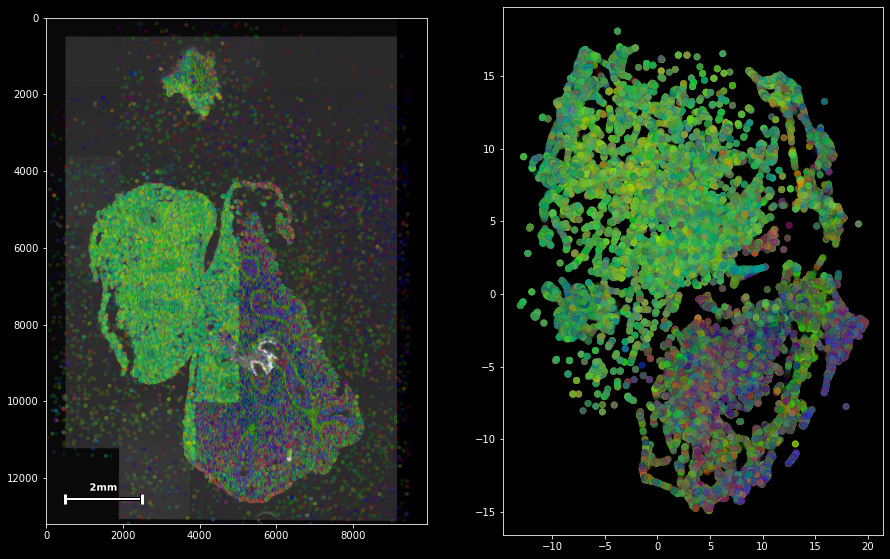

In [14]:
sdata.graph.map_and_umap(alpha=0.1)

In [15]:
sdata.graph.umap_js()

    'data': [{'hoverinfo': 'none',
              'marker': {'colo…

In [16]:
assert False

AssertionError: 

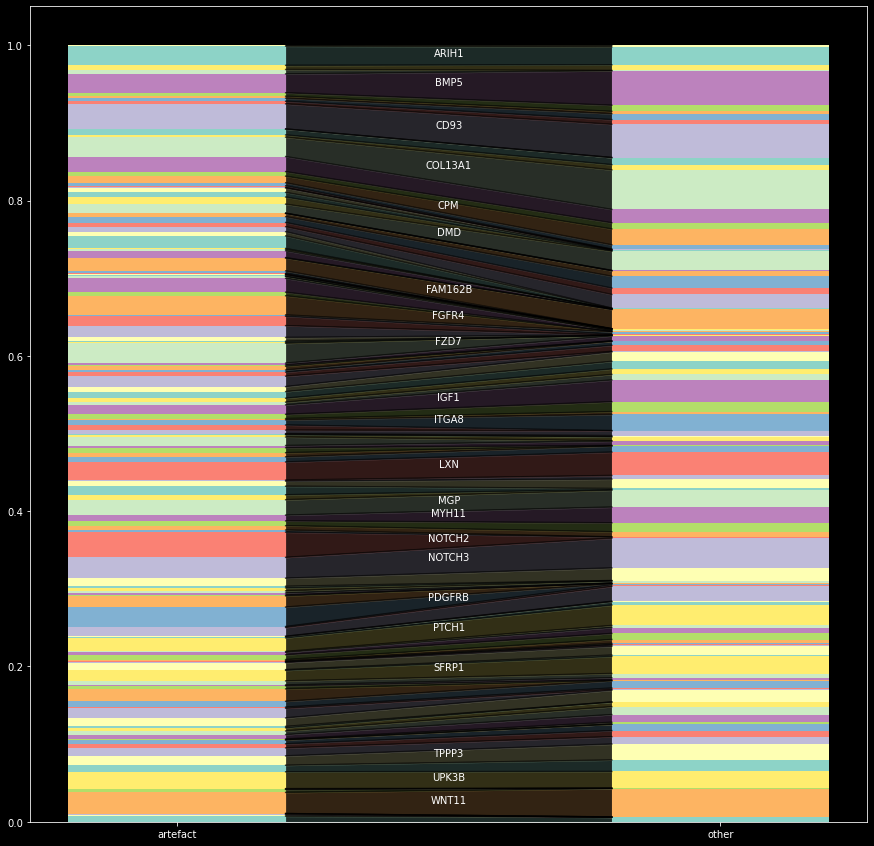

In [28]:
from plankton.utils import hbar_compare

hbar_compare(sdata[sdata.artefact].stats,sdata[~sdata.artefact].stats,('artefact','other'))

In [41]:
genes_artefact = sdata.genes[((sdata[sdata.artefact].counts/sdata.counts)>0.58)]

sdata = sdata[~sdata.g.isin(genes_artefact)]

In [ ]:
from plankton import utils

utils.hbar_compare(sdata[sdata.artefact].stats,sdata[~sdata.artefact].stats,('artefact','remaining'))

In [ ]:
from scipy.stats import binom

p_artefact = sdata[sdata.artefact].counts/sdata.counts#binom.cdf(sdata[sdata.artefact].counts,sdata.counts,sdata.artefact.mean())


In [ ]:

sdata = sdata[~sdata.g.isin(sdata.genes[p_artefact>0.6])]
# sdata[sdata.g.isin(sdata.genes[(p_artefact>0.999999)])].scatter()

In [ ]:
sdata.save('bronchi.pl')

In [ ]:
from plankton import utils

utils.hbar_compare(sdata[sdata.artefact].stats,sdata[~sdata.artefact].stats,('artefact','rest'))
# 

In [ ]:
from scipy.stats import binom

p_artefact = binom.cdf(sdata[sdata.artefact].counts,sdata.counts,sdata.artefact.mean())


In [ ]:
artefact_genes = sdata.genes[np.argsort(p_artefact)[86:]]

In [ ]:
sdata = sdata[~sdata.g.isin(artefact_genes)]

In [ ]:
sdata.scatter(alpha=0.1)

In [45]:
# Parameterization for data cleaning/artefact removal:`

import time

knn_neighbors=250
bandwidth=40
n_neighbors=50
metric='euclidean'
min_dist=0.02
random_state=42
zero_weight=0.0
cutoff=20

_=sdata.graph.update_knn(n_neighbors=knn_neighbors)


t = time.perf_counter()
sdata.graph.run_umap(bandwidth=bandwidth,n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state,zero_weight=zero_weight,cutoff=cutoff)
print(time.perf_counter()-t)


Reducing dimensions with FastICA


/home/sebastian/anaconda3/envs/plankton-dev/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning:

From version 1.3 whiten='unit-variance' will be used by default.



Calculating UMAP embedding.
499.71143657399807


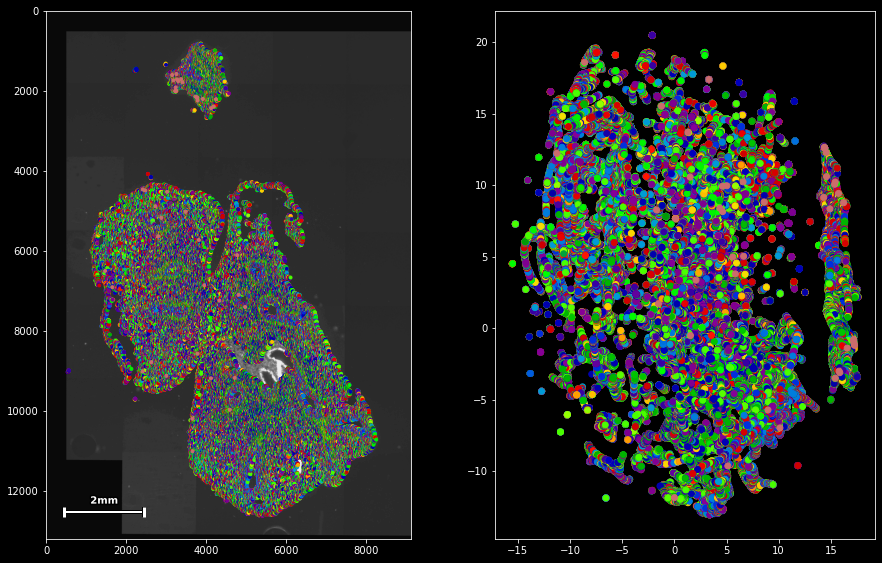

In [46]:
sdata.graph.map_and_umap()

In [47]:
sdata.graph.umap_js()

    'data': [{'hoverinfo': 'none',
              'marker': {'colo…